In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# load data
data  = pd.read_csv('kdd_train.csv')

In [5]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
# number of attack labels 
data['labels'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: labels, dtype: int64

In [7]:
def change_label(df):
  df.labels.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.labels.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.labels.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.labels.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [8]:
change_label(data)

In [9]:
#data = data[0:10000]

In [10]:
# distribution of attack classes
data.labels.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: labels, dtype: int64

In [11]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['protocol_type']= label_encoder.fit_transform(data['protocol_type'])
data['service']= label_encoder.fit_transform(data['service'])
data['flag']= label_encoder.fit_transform(data['flag'])
data['labels']= label_encoder.fit_transform(data['labels'])

data['protocol_type'].unique()
data['service'].unique()
data['flag'].unique()
data['labels'].unique()

array([4, 0, 2, 1, 3], dtype=int64)

In [12]:
X = data.drop(["labels"],axis =1)
y = data["labels"]

# Chi-Square

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [14]:
chi2_features = SelectKBest(chi2, k = 10)
X_kbest = chi2_features.fit_transform(X, y)

In [15]:
X_kbest

array([[  0.,  20.,   9., ...,   2., 150.,  25.],
       [  0.,  44.,   9., ...,   1., 255.,   1.],
       [  0.,  49.,   5., ...,   6., 255.,  26.],
       ...,
       [  0.,  54.,   9., ...,   1., 255.,  30.],
       [  0.,  30.,   5., ...,   8., 255.,   8.],
       [  0.,  20.,   9., ...,   1., 255.,  77.]])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100778, 10), (100778,), (25195, 10), (25195,))

In [17]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
spec = []
errate = []


#function to call for storing the results
def storeResults(model, a,b,c,d,e,f):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    spec.append(round(e,3))
    errate.append(round(f,3))

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import specificity_score

# SVM

In [19]:
from sklearn.svm import SVC

# instantiate the model 
svm = SVC(probability=True)

# fit the model 
svm.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = svm.predict(X_test)

svm_acc = accuracy_score(y_pred, y_test)
svm_prec = precision_score(y_pred, y_test,average='weighted')
svm_rec = recall_score(y_pred, y_test,average='weighted')
svm_f1 = f1_score(y_pred, y_test,average='weighted')
svm_spec = specificity_score(y_test, y_pred, average='weighted')
svm_error = 1 - svm_acc

storeResults('Support Vector Machine  - CHI Square',svm_acc,svm_prec,svm_rec,svm_f1,svm_spec,svm_error)

# Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model 
nb = GaussianNB()

# fit the model 
nb.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = nb.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test,average='weighted')
nb_rec = recall_score(y_pred, y_test,average='weighted')
nb_f1 = f1_score(y_pred, y_test,average='weighted')
nb_spec = specificity_score(y_test, y_pred, average='weighted')
nb_error = 1 - nb_acc

storeResults('Naive Bayes - CHI Square',nb_acc,nb_prec,nb_rec,nb_f1,nb_spec,nb_error)

# Stacking Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=1000)),('mlp', MLPClassifier(random_state=1, max_iter=3000))]

clf = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=1000))


clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')
stac_spec = specificity_score(y_test, y_pred, average='weighted')
stac_error = 1 - stac_acc

storeResults('Stacking Classifier - CHI Square',stac_acc,stac_prec,stac_rec,stac_f1,stac_spec,stac_error)

# Voting Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)

eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')
vot_spec = specificity_score(y_test, y_pred, average='weighted')
vot_error = 1 - vot_acc

storeResults('Voting Classifier - CHI Square',vot_acc,vot_prec,vot_rec,vot_f1,vot_spec,vot_error)

# Lasso

In [23]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)

model = SelectFromModel(lsvc, prefit=True)

In [24]:
X_new = model.transform(X)

In [25]:
X_new.shape

(125973, 32)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100778, 32), (100778,), (25195, 32), (25195,))

# SVC

In [27]:
from sklearn.svm import SVC

# instantiate the model 
svm1 = SVC(probability=True)

# fit the model 
svm1.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = svm1.predict(X_test)

svm_acc = accuracy_score(y_pred, y_test)
svm_prec = precision_score(y_pred, y_test,average='weighted')
svm_rec = recall_score(y_pred, y_test,average='weighted')
svm_f1 = f1_score(y_pred, y_test,average='weighted')
svm_spec = specificity_score(y_test, y_pred, average='weighted')
svm_error = 1 - svm_acc

storeResults('Support Vector Machine  - Lasso',svm_acc,svm_prec,svm_rec,svm_f1,svm_spec,svm_error)

# Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model 
nb1 = GaussianNB()

# fit the model 
nb1.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = nb1.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test,average='weighted')
nb_rec = recall_score(y_pred, y_test,average='weighted')
nb_f1 = f1_score(y_pred, y_test,average='weighted')
nb_spec = specificity_score(y_test, y_pred, average='weighted')
nb_error = 1 - nb_acc

storeResults('Naive Bayes - Lasso',nb_acc,nb_prec,nb_rec,nb_f1,nb_spec,nb_error)

# Stacking Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=1000)),('mlp', MLPClassifier(random_state=1, max_iter=3000))]

clf1 = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=1000))


clf1.fit(X_train,y_train)

y_pred = clf1.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')
stac_spec = specificity_score(y_test, y_pred, average='weighted')
stac_error = 1 - stac_acc

storeResults('Stacking Classifier - Lasso',stac_acc,stac_prec,stac_rec,stac_f1,stac_spec,stac_error)

# Voting Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)

eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2)], voting='soft')
eclf2.fit(X_train, y_train)
y_pred = eclf2.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')
vot_spec = specificity_score(y_test, y_pred, average='weighted')
vot_error = 1 - vot_acc

storeResults('Voting Classifier - Lasso',vot_acc,vot_prec,vot_rec,vot_f1,vot_spec,vot_error)

# RFE

In [31]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
rfecv = RFECV(cv=50, estimator=RandomForestClassifier(random_state=0),
      scoring='accuracy')

In [32]:
rfecv.fit(X,y)

RFECV(cv=50, estimator=RandomForestClassifier(random_state=0),
      scoring='accuracy')

In [33]:
#to get number of the features
display('Number of features:', rfecv.n_features_)

#to get feature names
list(X.columns[rfecv.support_]) 

'Number of features:'

33

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'num_root',
 'num_file_creations',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [34]:
X_new = data[['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'hot',
 'logged_in',
 'num_compromised',
 'num_root',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']]

In [35]:
rfecv = RFECV(cv=10, estimator=RandomForestClassifier(random_state=0),
      scoring='accuracy')
rfecv.fit(X_new,y)
#to get number of the features
display('Number of features:', rfecv.n_features_)

#to get feature names
list(X_new.columns[rfecv.support_]) 

'Number of features:'

31

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'hot',
 'logged_in',
 'num_compromised',
 'num_root',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [36]:
X_2 = data[['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate']]

In [43]:
df = data[['protocol_type',
             'service',
             'flag',
             'src_bytes',
             'dst_bytes',
             'count',
             'srv_count',
             'serror_rate',
             'srv_serror_rate',
             'same_srv_rate',
             'diff_srv_rate',
             'dst_host_srv_count',
             'dst_host_same_srv_rate',
             'dst_host_diff_srv_rate',
             'dst_host_same_src_port_rate',
             'dst_host_srv_diff_host_rate',
             'dst_host_serror_rate',
             'dst_host_srv_serror_rate',
             'dst_host_rerror_rate',
              'labels']]
df.to_csv('kdd_processed.csv')

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100778, 19), (100778,), (25195, 19), (25195,))

# SVC

In [38]:
from sklearn.svm import SVC

# instantiate the model 
svm1 = SVC(probability=True)

# fit the model 
svm1.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = svm1.predict(X_test)

svm_acc = accuracy_score(y_pred, y_test)
svm_prec = precision_score(y_pred, y_test,average='weighted')
svm_rec = recall_score(y_pred, y_test,average='weighted')
svm_f1 = f1_score(y_pred, y_test,average='weighted')
svm_spec = specificity_score(y_test, y_pred, average='weighted')
svm_error = 1 - svm_acc

storeResults('Support Vector Machine  - RFE',svm_acc,svm_prec,svm_rec,svm_f1,svm_spec,svm_error)

# Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model 
nb1 = GaussianNB()

# fit the model 
nb1.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = nb1.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test,average='weighted')
nb_rec = recall_score(y_pred, y_test,average='weighted')
nb_f1 = f1_score(y_pred, y_test,average='weighted')
nb_spec = specificity_score(y_test, y_pred, average='weighted')
nb_error = 1 - nb_acc

storeResults('Naive Bayes - RFE',nb_acc,nb_prec,nb_rec,nb_f1,nb_spec,nb_error)

# Stacking Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=1000)),('mlp', MLPClassifier(random_state=1, max_iter=3000))]

clf1 = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=1000))


clf1.fit(X_train,y_train)

y_pred = clf1.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')
stac_spec = specificity_score(y_test, y_pred, average='weighted')
stac_error = 1 - stac_acc

storeResults('Stacking Classifier - RFE',stac_acc,stac_prec,stac_rec,stac_f1,stac_spec,stac_error)

# Voting Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)

eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2)], voting='soft')
eclf2.fit(X_train, y_train)
y_pred = eclf2.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')
vot_spec = specificity_score(y_test, y_pred, average='weighted')
vot_error = 1 - vot_acc

storeResults('Voting Classifier - RFE',vot_acc,vot_prec,vot_rec,vot_f1,vot_spec,vot_error)

# Comparison

In [42]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1score,
                        'Specificity' : spec,
                        'Error Rate' : errate
                      })


result

,ML Model,Accuracy,Precision,Recall,F1-Score,Specificity,Error Rate
0,Support Vector Machine - CHI Square,0.533,0.999,0.533,0.695,0.468,0.467
1,Naive Bayes - CHI Square,0.390,0.909,0.390,0.512,0.683,0.610
2,Stacking Classifier - CHI Square,0.995,0.996,0.995,0.995,0.998,0.005
3,Voting Classifier - CHI Square,0.997,0.997,0.997,0.997,0.998,0.003
4,Support Vector Machine - Lasso,0.857,0.947,0.857,0.895,0.856,0.143
5,Naive Bayes - Lasso,0.828,0.854,0.828,0.809,0.961,0.172
6,Stacking Classifier - Lasso,0.995,0.995,0.995,0.995,0.997,0.005
7,Voting Classifier - Lasso,0.997,0.997,0.997,0.997,0.997,0.003
8,Support Vector Machine - RFE,0.533,0.999,0.533,0.695,0.468,0.467
9,Naive Bayes - RFE,0.435,0.904,0.435,0.531,0.674,0.565


# Graph

In [44]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

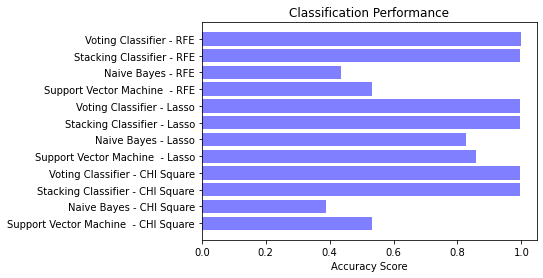

In [45]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

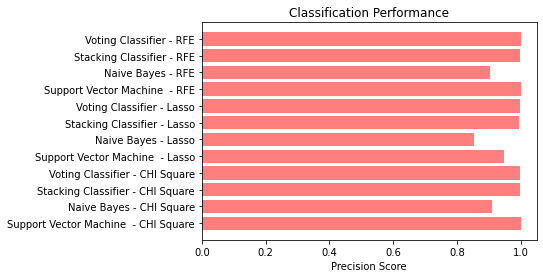

In [46]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

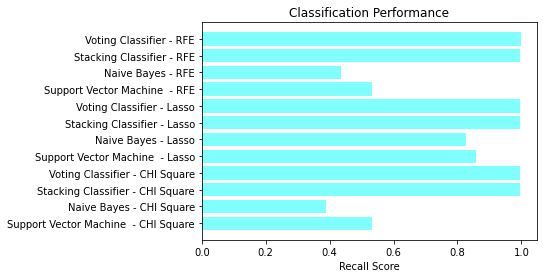

In [47]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

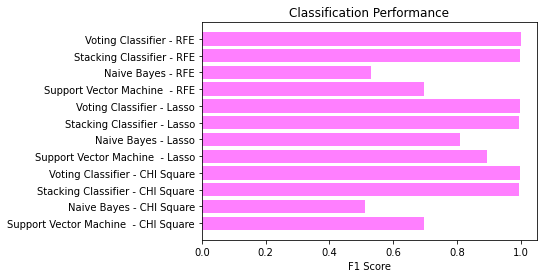

In [48]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Specificity

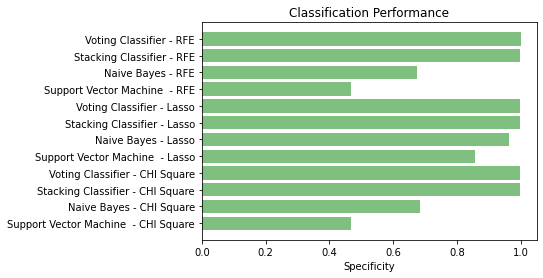

In [49]:
plt2.barh(y_pos, spec, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Specificity')
plt2.title('Classification Performance')
plt2.show()

# Error Rate

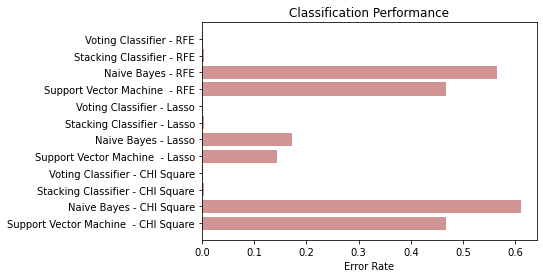

In [50]:
plt2.barh(y_pos, errate, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Error Rate')
plt2.title('Classification Performance')
plt2.show()

# Modelling

In [51]:
import joblib
filename = 'model.sav'
joblib.dump(eclf2, filename)

['model.sav']